In [1]:
%load_ext autoreload
%autoreload 2

from mcts import * 
from tictactoe import *
from utils import *
import numpy as np
import random
import collections

In [60]:
board = np.array([[1, 1, 0], [0, 0, 0], [0, 0, 0]]) #np.zeros((3,3))

In [72]:
state = GameState(board, player =-1)
root = MCTSNode(state)
agent = MCTSAgent(root)

root = agent.run_mcts(10000)

In [73]:
for i in range(len(root.children)):
    print(root.children[i].value())
    root.children[i].state.print_board()

0.453551912568306

X  X  O

-  -  -

-  -  -
0.7172675521821632

X  X  -

O  -  -

-  -  -
0.5384615384615384

X  X  -

-  O  -

-  -  -
0.6583747927031509

X  X  -

-  -  O

-  -  -
0.40540540540540543

X  X  -

-  -  -

O  -  -
0.9311613163678772

X  X  -

-  -  -

-  O  -
0.696969696969697

X  X  -

-  -  -

-  -  O


In [71]:
root.children[0].children

[]

# Visualization


In [27]:
from graphviz import Digraph
import numpy as np

def visualize_mcts_tree(root):
    dot = Digraph(comment='MCTS Tree', format='png')

    def add_nodes_edges(node):
        # Add node with label including visits and value
        label = f"Visits: {node.visits}\nValue: {node.value():.2f}"
        dot.node(str(id(node)), label=label, tooltip=f"UCT: {calculate_uct_value(node)}")
        
        for child in node.children:
            # Add edge from parent to child
            dot.edge(str(id(node)), str(id(child)))
            add_nodes_edges(child)
    
    def calculate_uct_value(node, C=1.4):
        if node.parent is None:
            return float('inf')  # Root node, no UCT value
        return node.value() + C * np.sqrt((2 * np.log(node.parent.visits) / node.visits))

    add_nodes_edges(root)
    return dot

# Assuming `root` is your MCTS tree root node
dot = visualize_mcts_tree(root)
# Save or render the dot object, for example:
dot.render('mcts_tree_visualization', format='png', view=True)


'mcts_tree_visualization.png'

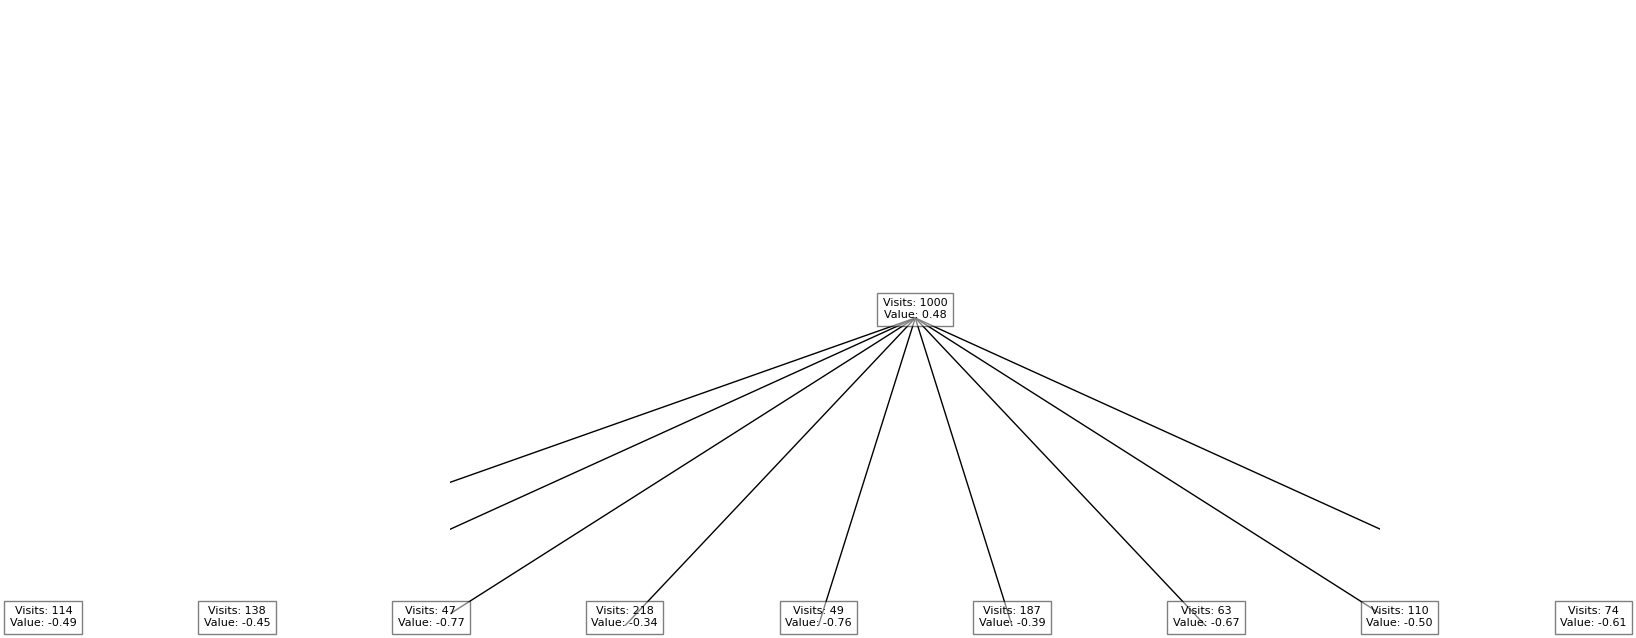

In [11]:
import matplotlib.pyplot as plt

def draw_mcts_tree(node, level=0, parent_pos=None, node_pos={}, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.invert_yaxis()  # So that the root is at the top
    
    if parent_pos is None:
        parent_pos = (0.5, 0)  # Start drawing from the middle top
    
    node_pos[node] = (parent_pos[0], level)
    ax.text(parent_pos[0], level, f'Visits: {node.visits}\nValue: {node.value():.2f}',
            ha='center', size=8, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    child_step = 1 / (2 ** (level + 2))  # Horizontal space between children decreases with each level
    child_positions = [(parent_pos[0] + (i - len(node.children) / 2) * child_step, level + 1) 
                       for i in range(len(node.children))]
    
    for child, child_pos in zip(node.children, child_positions):
        ax.plot([parent_pos[0], child_pos[0]], [level, level + 1], 'k-', lw=1)
        draw_mcts_tree(child, level + 1, child_pos, node_pos, ax)
    
    if level == 0:  # Final adjustments on the root call
        ax.axis('off')
        ax.set_xlim(-0.1, 1.1)
        ax.set_ylim(level + 1, -1)
        plt.show()

# Example usage:
# Assuming you have an MCTS tree with 'root' as the root node
draw_mcts_tree(root)


In [ ]:
import matplotlib.pyplot as plt

def draw_mcts_tree(node, level=0, parent_pos=None, node_pos={}, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.invert_yaxis()  # So that the root is at the top
    
    if parent_pos is None:
        parent_pos = (0.5, 0)  # Start drawing from the middle top
    
    node_pos[node] = (parent_pos[0], level)
    ax.text(parent_pos[0], level, f'Visits: {node.visits}\nValue: {node.value():.2f}',
            ha='center', size=8, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    child_step = 1 / (2 ** (level + 2))  # Horizontal space between children decreases with each level
    child_positions = [(parent_pos[0] + (i - len(node.children) / 2) * child_step, level + 1) 
                       for i in range(len(node.children))]
    
    for child, child_pos in zip(node.children, child_positions):
        ax.plot([parent_pos[0], child_pos[0]], [level, level + 1], 'k-', lw=1)
        draw_mcts_tree(child, level + 1, child_pos, node_pos, ax)
    
    if level == 0:  # Final adjustments on the root call
        ax.axis('off')
        ax.set_xlim(-0.1, 1.1)
        ax.set_ylim(level + 1, -1)
        plt.show()

# Example usage:
# Assuming you have an MCTS tree with 'root' as the root node
# draw_mcts_tree(root)


In [15]:
board = np.zeros((3, 3))
user = 1

state = GameState(board, user)


while state.is_terminal() == False:
    # get user input 
    state.print_board()
    print('----------')
    action = input('Enter the action in the format i,j: ')
    i, j = action.split(',')
    i, j = int(i), int(j)

    if board[i,j] != 0:
        print('Invalid move')

    state = state.take_action((i,j))
    if state.is_terminal():
        break

    # get agent response
    root = MCTSNode(state)
    agent = MCTSAgent(root)
    root = agent.step(1000)

    # select the action with the highest value
    top_child = agent.selection_policy(root)
    state = top_child.state


-  -  -

-  -  -

-  -  -
----------



X  O  -

-  -  -

-  -  -
----------

X  O  -

-  X  -

-  O  -
----------

X  X  -

-  X  -

O  O  -
----------


ValueError: not enough values to unpack (expected 2, got 1)

In [142]:
for c in root.children: 
    print(c.value())
    c.state.print_board()

0.11764705882352941

O  O  -

-  X  -

-  -  X
0.25

-  O  O

-  X  -

-  -  X
0.6555023923444976

-  O  -

O  X  -

-  -  X
0.6636771300448431

-  O  -

-  X  O

-  -  X
0.6071428571428571

-  O  -

-  X  -

O  -  X
0.7295597484276729

-  O  -

-  X  -

-  O  X


In [140]:
for child in root.children:
    child.state.print_board()
    print('\n')


O  O  -

-  X  -

-  -  X



-  O  O

-  X  -

-  -  X



-  O  -

O  X  -

-  -  X



-  O  -

-  X  O

-  -  X



-  O  -

-  X  -

O  -  X



-  O  -

-  X  -

-  O  X




In [141]:
def print_child(root):
    print(root.state.print_board())
    print_child(root.children[0])    

print_child(root)


-  O  -

-  X  -

-  -  X
None

O  O  -

-  X  -

-  -  X
None


IndexError: list index out of range

In [91]:
root.children[0].children[0].children[0].children